In [10]:
#Packages for analysis
#In pandas the data frame is like an Excel Sheet , you have columns and indexes and different ways of referring
import pandas as pd
import numpy as np
from sklearn import svm

In [11]:
#packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set(font_scale=1.2)

In [12]:
#Allows charts to appear in the notebook
%matplotlib inline

In [13]:
#Pickle package
import pickle

In [15]:
#Reading data from the excel file
#recipes is a variable
recipes=pd.read_csv('Cupcakes vs Muffins.csv')
print(recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


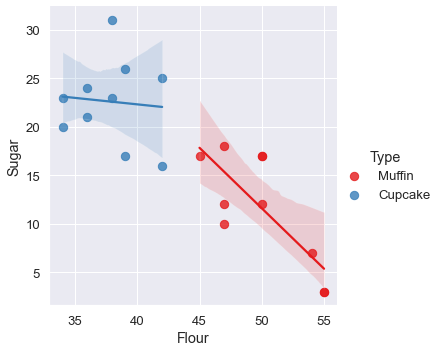

In [20]:
#Plot our data 
#Best settings for doing a seaborn plot
#Here we plot only flour and sugar , but we can select any of the ingrediants
#hue is pandas mixed with seaborn
#Seaborn is used here for the plot
#fit_reg is false as we do not want to fit anything 
#we can notice that hyperplane is drawn in both sugar and flour
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',palette='Set1',fit_reg='false',scatter_kws={"s":70});

In [27]:
#Then format or preprocess our data
#we need type and label inorder to decide whether muffin or cupcake, but the computer knows only 0,1
#Creating an array 0 for Muffins and 1 for cupcake
#recipes.columns.values is a built in funtion in pandas so we start after the Type which is column 0
type_label = np.where(recipes['Type']=='Muffin', 0,1 )
recipe_features=recipes.columns.values[1:].tolist()
recipe_features
ingredients=recipes[['Flour','Sugar']].values
ingredientsAll=recipes[recipe_features].values
print(ingredients)
print(ingredientsAll)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]
[[55 28  3  7  5  2  0  0]
 [47 24 12  6  9  1  0  0]
 [47 23 18  6  4  1  0  0]
 [45 11 17 17  8  1  0  0]
 [50 25 12  6  5  2  1  0]
 [55 27  3  7  5  2  1  0]
 [54 27  7  5  5  2  0  0]
 [47 26 10 10  4  1  0  0]
 [50 17 17  8  6  1  0  0]
 [50 17 17 11  4  1  0  0]
 [39  0 26 19 14  1  1  0]
 [42 21 16 10  8  3  0  0]
 [34 17 20 20  5  2  1  0]
 [39 13 17 19 10  1  1  0]
 [38 15 23 15  8  0  1  0]
 [42 18 25  9  5  1  0  0]
 [36 14 21 14 11  2  1  0]
 [38 15 31  8  6  1  1  0]
 [36 16 24 12  9  1  1  0]
 [34 17 23 11 13  0  1  0]]


In [33]:
#The next step is to fit our model
#svc is support vector classifier
#after building the model it will be followed by the fit command
#In our case ingredients as defined before are flour and sugar
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [42]:
#Get the separating hyperplane
#w will represent two different coefficients as y=mx+c
#This is typically the slope that we are generating
#xx we are going to set it up to a numpy array, so we are creating the line plus the intercept
#yy is the slope(a) multiplied by each value in the array(xx) and then subtract the model intercept
w = model.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(30,60)
yy = a*xx-(model.intercept_[0]/w[1])
print(yy)
#Plot the parallels to the separating hyperplane that passes through the support vectors
b = model.support_vectors_[0]
yy_down=a*xx+(b[1]-a*b[0])
b = model.support_vectors_[-1]
yy_up = a*xx+(b[1]-a*b[0])
print(yy_up)

[ 1.15779472e+16  1.10528750e+16  1.05278028e+16  1.00027306e+16
  9.47765844e+15  8.95258624e+15  8.42751405e+15  7.90244185e+15
  7.37736965e+15  6.85229746e+15  6.32722526e+15  5.80215306e+15
  5.27708087e+15  4.75200867e+15  4.22693647e+15  3.70186428e+15
  3.17679208e+15  2.65171988e+15  2.12664769e+15  1.60157549e+15
  1.07650329e+15  5.51431096e+14  2.63588995e+13 -4.98713297e+14
 -1.02378549e+15 -1.54885769e+15 -2.07392989e+15 -2.59900208e+15
 -3.12407428e+15 -3.64914648e+15 -4.17421867e+15 -4.69929087e+15
 -5.22436307e+15 -5.74943526e+15 -6.27450746e+15 -6.79957966e+15
 -7.32465185e+15 -7.84972405e+15 -8.37479625e+15 -8.89986844e+15
 -9.42494064e+15 -9.95001284e+15 -1.04750850e+16 -1.10001572e+16
 -1.15252294e+16 -1.20503016e+16 -1.25753738e+16 -1.31004460e+16
 -1.36255182e+16 -1.41505904e+16]
[ 1.02914151e+16  9.76634286e+15  9.24127066e+15  8.71619846e+15
  8.19112627e+15  7.66605407e+15  7.14098187e+15  6.61590968e+15
  6.09083748e+15  5.56576528e+15  5.04069309e+15  4.5156

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


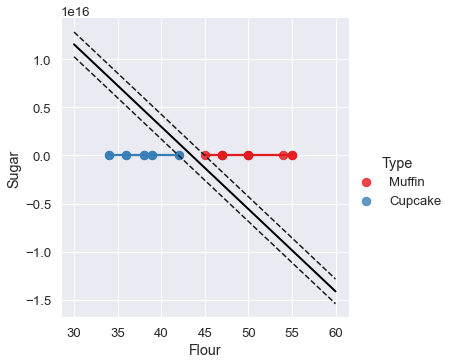

In [43]:
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',palette='Set1',fit_reg='false',scatter_kws={"s":70});
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')

In [59]:
#Create a function to predict Muffin or cupcake
def muffin_or_cupcake(Flour,Sugar):
    if(model.predict([[Flour,Sugar]]))==0:
        print('you are looking for Muffin recipe')
    else:
        print('you are looking for a cupcake recipe')
  

#predict for 50 parts of flour and 20 parts of sugar
muffin_or_cupcake(50,20)
muffin_or_cupcake(10,20)
muffin_or_cupcake(60,20)
muffin_or_cupcake(40,20)

you are looking for Muffin recipe
you are looking for a cupcake recipe
you are looking for Muffin recipe
you are looking for a cupcake recipe


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


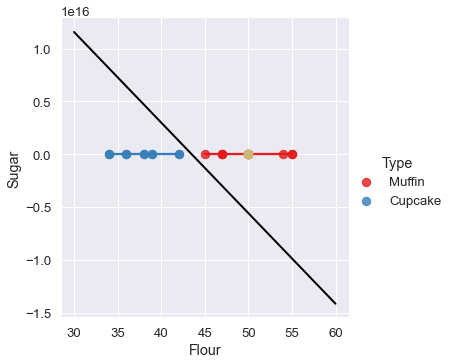

In [62]:
#Let's plot this on the graph
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',palette='Set1',fit_reg='false',scatter_kws={"s":70});
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(50,20,'yo',markersize='9')